In [1]:
## 가져올 모듈들
from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# 1. 데이터셋 설정

In [2]:
## Fashion MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. 모델 설정

In [3]:
## 신경망 모델
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 입력 이미지를 1차원 배열로 평탄화
    layers.Dense(128, activation='relu'),  # 첫 번째 완전 연결층 (은닉층)
    layers.Dense(10, activation='softmax') # 출력층 (10개의 클래스에 대한 확률 분포)
])

## 모델 컴파일
model.compile(optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

## 신경망 모델 훈련
history = model.fit(train_images, train_labels, epochs=10, batch_size=512,
                    validation_data=(test_images, test_labels))

Epoch 1/10
118/118 [==============================] - 4s 23ms/step - loss: 0.7614 - accuracy: 0.7431 - val_loss: 0.5931 - val_accuracy: 0.7915
Epoch 2/10
118/118 [==============================] - 3s 21ms/step - loss: 0.5104 - accuracy: 0.8212 - val_loss: 0.4913 - val_accuracy: 0.8304
Epoch 3/10
118/118 [==============================] - 3s 29ms/step - loss: 0.4555 - accuracy: 0.8378 - val_loss: 0.5724 - val_accuracy: 0.7965
Epoch 4/10
118/118 [==============================] - 3s 26ms/step - loss: 0.4181 - accuracy: 0.8513 - val_loss: 0.4757 - val_accuracy: 0.8295
Epoch 5/10
118/118 [==============================] - 3s 27ms/step - loss: 0.3934 - accuracy: 0.8593 - val_loss: 0.4450 - val_accuracy: 0.8391
Epoch 6/10
118/118 [==============================] - 2s 20ms/step - loss: 0.3734 - accuracy: 0.8648 - val_loss: 0.5369 - val_accuracy: 0.7954
Epoch 7/10
118/118 [==============================] - 2s 21ms/step - loss: 0.3596 - accuracy: 0.8703 - val_loss: 0.5470 - val_accuracy: 0.8019

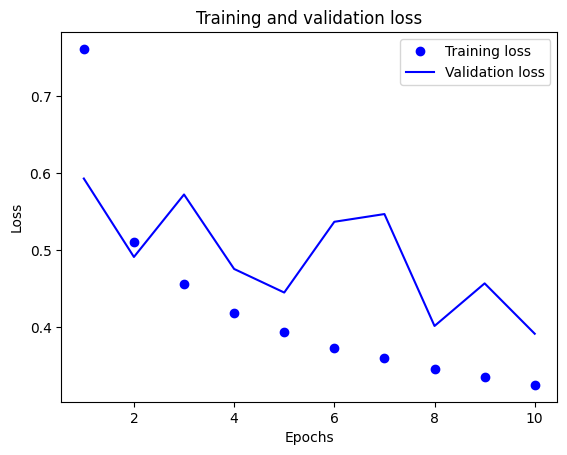

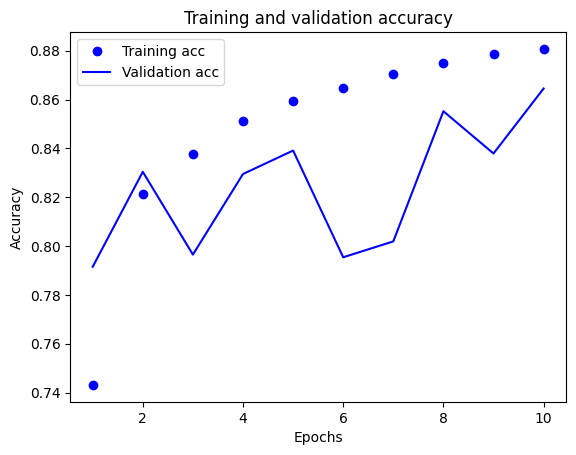

313/313 [==============================] - 1s 2ms/step - loss: 0.3915 - accuracy: 0.8645
Test Loss: 0.3915218114852905
Test Accuracy: 0.8644999861717224


In [4]:
## 훈련 및 검증 손실 그래프
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 훈련 및 검증 정확도 그래프
plt.clf() ## 그래프 초기화
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 테스트 성능 출력
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# 3. 최적화 및 일반화 방안 구축

In [5]:
## 새로운 신경망 구조
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),                   # 드롭아웃 추가
    layers.Dense(10, activation='softmax')
])

## 모델 컴파일
model.compile(optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

## 조기종료 설정 => 훈련 중 성능 미향상 시 훈련을 조기 종료해 오버 피팅 방지
early_stopping = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights=True)

## 훈련
history = model.fit(train_images, train_labels, epochs=50, batch_size=512,
                    validation_data=(test_images, test_labels),callbacks=[early_stopping])

Epoch 1/50
118/118 [==============================] - 2s 14ms/step - loss: 0.8987 - accuracy: 0.6930 - val_loss: 0.5716 - val_accuracy: 0.7963
Epoch 2/50
118/118 [==============================] - 1s 12ms/step - loss: 0.5917 - accuracy: 0.7943 - val_loss: 0.4996 - val_accuracy: 0.8223
Epoch 3/50
118/118 [==============================] - 2s 16ms/step - loss: 0.5210 - accuracy: 0.8197 - val_loss: 0.4695 - val_accuracy: 0.8255
Epoch 4/50
118/118 [==============================] - 4s 30ms/step - loss: 0.4843 - accuracy: 0.8319 - val_loss: 0.4363 - val_accuracy: 0.8429
Epoch 5/50
118/118 [==============================] - 3s 26ms/step - loss: 0.4627 - accuracy: 0.8368 - val_loss: 0.4306 - val_accuracy: 0.8442
Epoch 6/50
118/118 [==============================] - 3s 26ms/step - loss: 0.4481 - accuracy: 0.8403 - val_loss: 0.4200 - val_accuracy: 0.8486
Epoch 7/50
118/118 [==============================] - 2s 20ms/step - loss: 0.4333 - accuracy: 0.8453 - val_loss: 0.4104 - val_accuracy: 0.8534

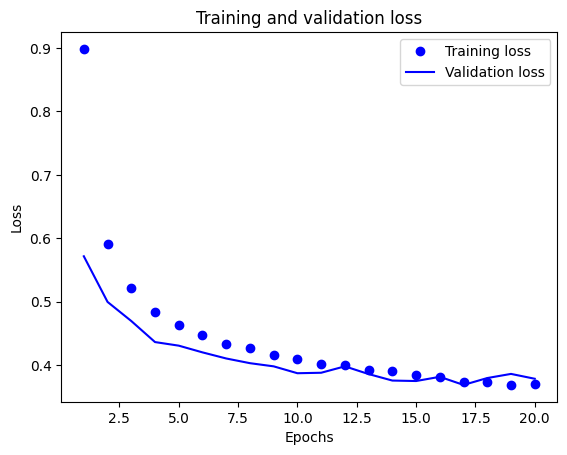

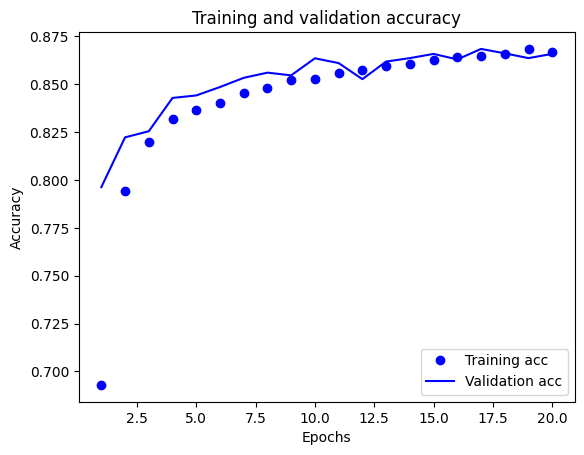

313/313 [==============================] - 1s 4ms/step - loss: 0.3687 - accuracy: 0.8685
Test Loss: 0.3686636686325073
Test Accuracy: 0.8684999942779541


In [6]:
## 훈련 및 검증 손실 그래프
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 훈련 및 검증 정확도 그래프
plt.clf() ## 그래프 초기화
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 테스트 성능 출력
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)